# Spectroscopic line data 

ArchNEMESIS includes a reference class to operate with spectroscopic line data from databases such as [HITRAN](https://hitran.org/). Specifically, the attributes of the LineData class include the information required to calculate the line-by-line cross sections at arbitrary pressures and temperatures (e.g., line strengths, broadening coefficiencts, partition functions, etc). In addition, this class includes methods to download line-by-line data from the HITRANonline site and partition functions from TIPS, as well as methods to filter and process the line data - these capabilities rely on the [HITRAN Application Programming Interface (HAPI)](https://hitran.org/hapi/) Python library.

In this notebook, we provide some examples showing how archNEMESIS can be used to process the spectroscopic line data.

In [1]:
import archnemesis as ans
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import sys,os,shutil

## 1. Downloading line data from HITRAN

In this section, we show how archNEMESIS can be used to download spectroscopic linedata from HITRANonline using the methods in the LineData class, which rely on the HAPI library. In addition, we are going to read the partition functions from TIPS [(Gamache et al., 2021)](https://doi.org/10.1016/j.jqsrt.2021.107713), so that the line strengths can be calculated at any arbitrary temperature. Then, we will create some diagnostic plots using the methods of the LineData class.

In [2]:
#Inputs
##########################################################################

#Radtran ID and isotope ID (ISO = 0 for all isotopes)
gasID = 1
isoID = 0

#Wavenumber range
vmin = 2000.
vmax = 4000.

#Other inputs
DATABASE = ans.enums.SpectroscopicLineList.HITRAN    #We indicate to the class that we will use HITRAN
DATAFILE = None     #File where the line data is stored (here None since we will download it)

In [3]:
#Initialising LineData class
LineData = ans.LineData_0(ID=gasID,ISO=isoID,DATAFILE=DATAFILE,DATABASE=DATABASE)

#Downloading the line data in our required spectral range
keep_data = True    #Flag to indicate whether the data file shall be kept or removed after being downloaded
LineData.fetch_linedata(vmin=vmin,vmax=vmax,keep_data=keep_data)

#Downloading the partition sums 
LineData.fetch_partition_function_tips()

HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

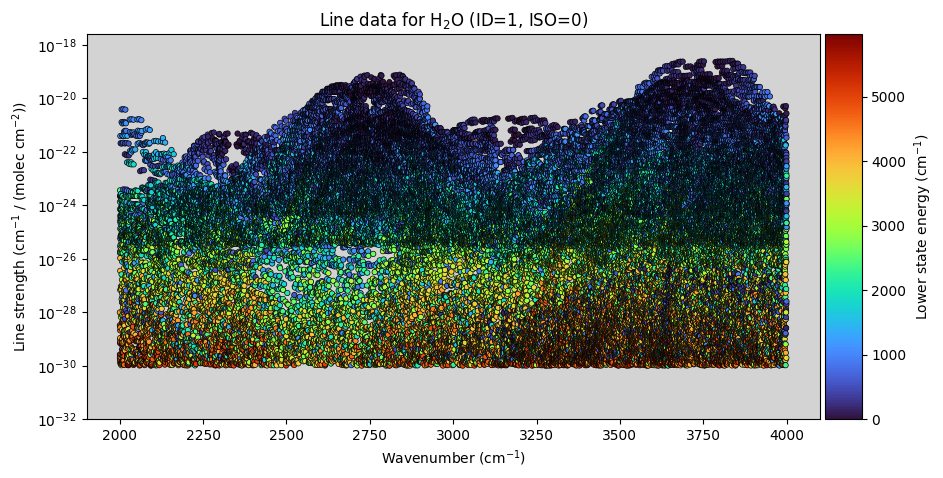

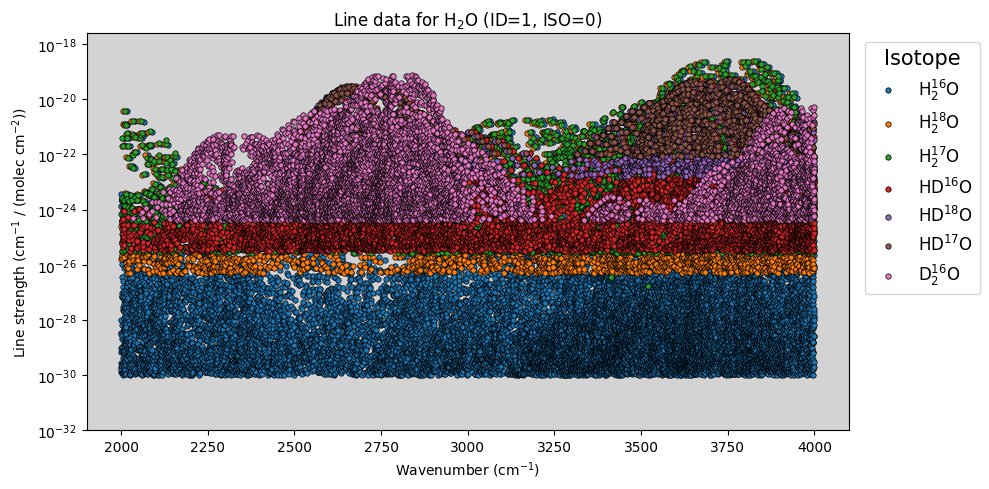

In [4]:
#Creating diagnostic plots
LineData.plot_linedata(smin=1.0e-32,logscale=True)

## 2. Reading line data from a local HITRAN-formatted file

Apart from downloading the data from HITRANonline, the LineData class can be used to read the data from a file stored locally. Currently, this local file is expected to be formatted using the HITRAN format, but future development will include other formats relevant to read line data from different spectroscopic line databases.

The local file may include line data for all gases and isotopes, and the LineData class will filter those values only relevant for the specified isotope. 

Here, we are going to use the file we downloaded in the previous section, but will initialise the class to filter only HDO transitions. Additionally, we will only look at a narrower spectral range.

In [5]:
#Inputs
##########################################################################

#Radtran ID and isotope ID (ISO = 0 for all isotopes)
gasID = 1
isoID = 4

#Wavenumber range
vmin = 2750.
vmax = 3250.

#Other inputs
DATABASE = ans.enums.SpectroscopicLineList.HITRAN    #We indicate to the class that we will use HITRAN
DATAFILE = './H2O'  #Now we specify the name of the file, so that no data is downloaded

Using .

H2O
                     Lines parsed: 56962


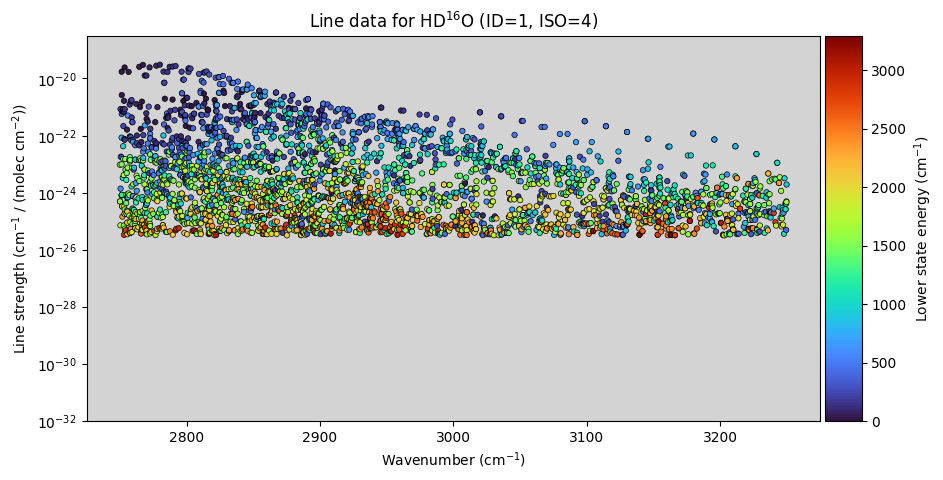

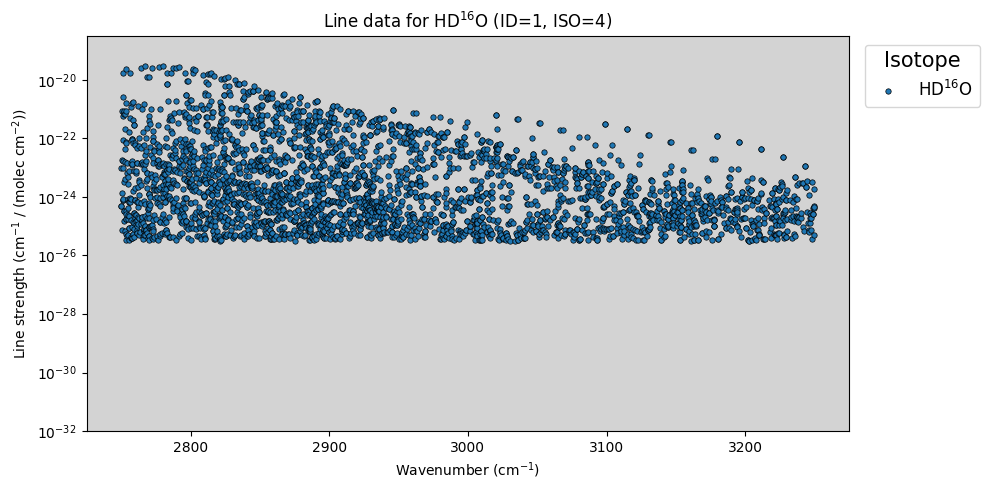

In [6]:
#Initialising LineData class
LineData = ans.LineData_0(ID=gasID,ISO=isoID,DATAFILE=DATAFILE,DATABASE=DATABASE)

#Reading the line data in our required spectral range
keep_data = True    #Flag to indicate whether the data file shall be kept or removed after being downloaded
LineData.fetch_linedata(vmin=vmin,vmax=vmax,keep_data=keep_data)

#Downloading the partition sums
LineData.fetch_partition_function_tips()

#Plotting the data
LineData.plot_linedata(smin=1.0e-32,logscale=True)

## 3. Performing calculations with the line data

Once the line data has been read, users may perform calculations using the attributes of the LineData class. Some methods are built-in within the class, but users may also define their own custom functions using the attributes of the class.

Here, we provide an example of how to calculate the line strenghts at arbitrary temperatures using the *calculate_line_strength()* method. This method can be used to evaluate which transitions are more or less temperature-dependent.

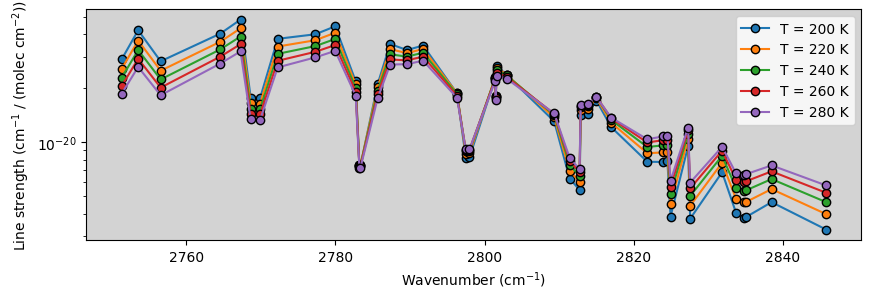

In [7]:
fig,ax1 = plt.subplots(1,1,figsize=(10,3))
psize = 5.
swlim = 5.0e-21

temps = [200.,220.,240.,260.,280.]

for i in range(len(temps)):
    ax1.plot(LineData.NU[LineData.SW>swlim],LineData.calculate_line_strength(temps[i])[LineData.SW>swlim],marker='o',markeredgecolor='black',label='T = '+str(int(temps[i]))+' K')

ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Line strength (cm$^{-1}$ / (molec cm$^{-2}$))')
ax1.set_facecolor('lightgray')